In [2]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns

sns.set_style("white")

from pprint import pprint
from config import api_key

#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

In [11]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)

first_championID_list_gold_DF

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5
3,127,6,185458,1603427040000,163858,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89
...,...,...,...,...,...,...,...,...,...
95,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC
96,145,7,107244,1603513387000,85644,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0
97,17,5,47110,1597116181000,25510,0,True,2,-ZI-Uc0tROMplkiZ1B8IEMKSq4eprGnWvZ1r8FwX-73YZmbH
98,76,7,129202,1603516030000,107602,0,True,0,OuOBGysNq2zyAQjHaANmrMchu5c6hog__LAIBajvOMi0SMZs


In [12]:
#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
1,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
2,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
3,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
4,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
...,...,...,...,...,...,...,...,...,...
95,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
96,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
97,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ
98,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ


In [1]:
###Needs Work
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
keys = []
values = []
items = champion_dict.items()
for item in items:
    keys.append(item[0]), values.append(item[1])

#Print Keys and Values    
print ("keys : ", str(keys)) 
print(str(values))

NameError: name 'pd' is not defined

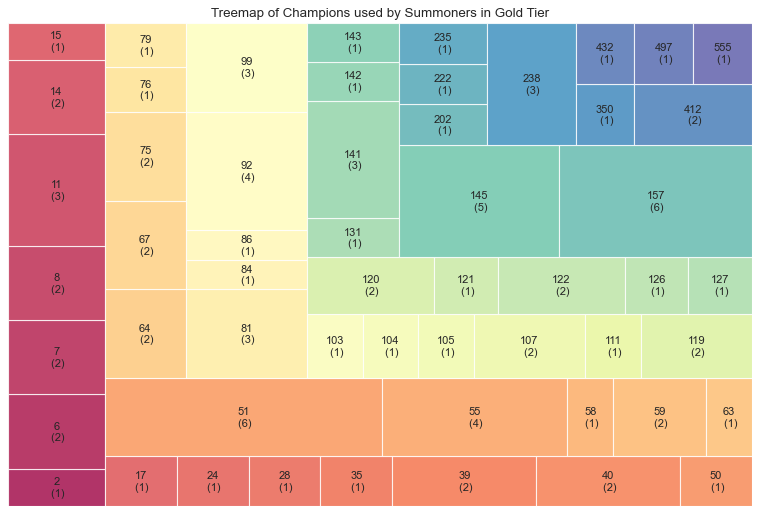

In [13]:
# Prepare Data
df = first_championID_list_gold_DF.groupby('championId').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier')
plt.axis('off')
plt.show()

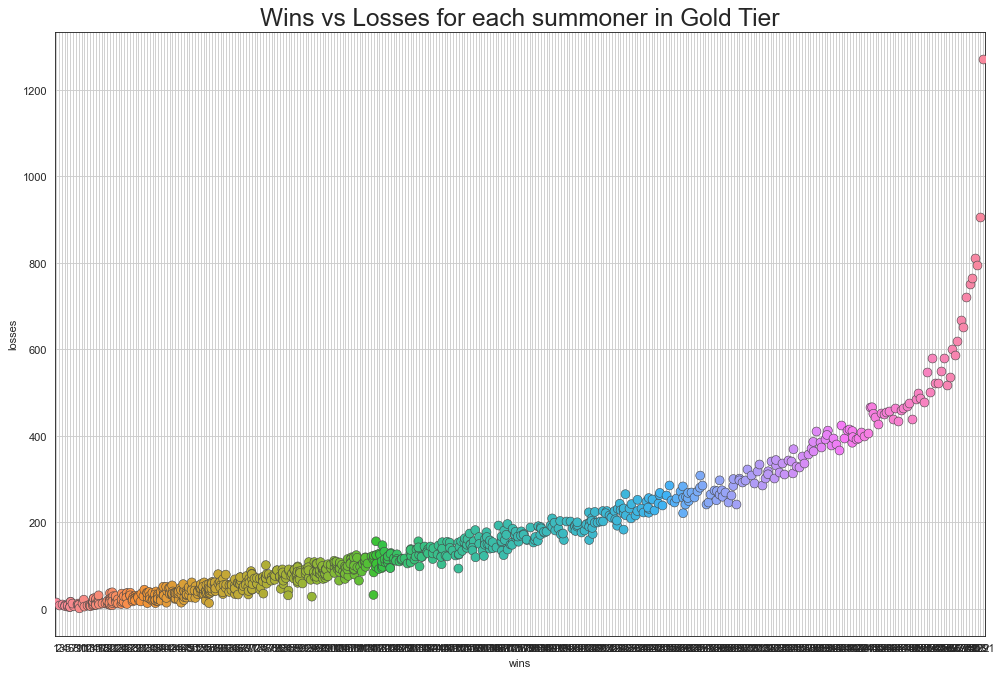

In [14]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_gold_df.wins, clean_gold_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)



# Decorations
plt.title('Wins vs Losses for each summoner in Gold Tier', fontsize=22)
plt.show()

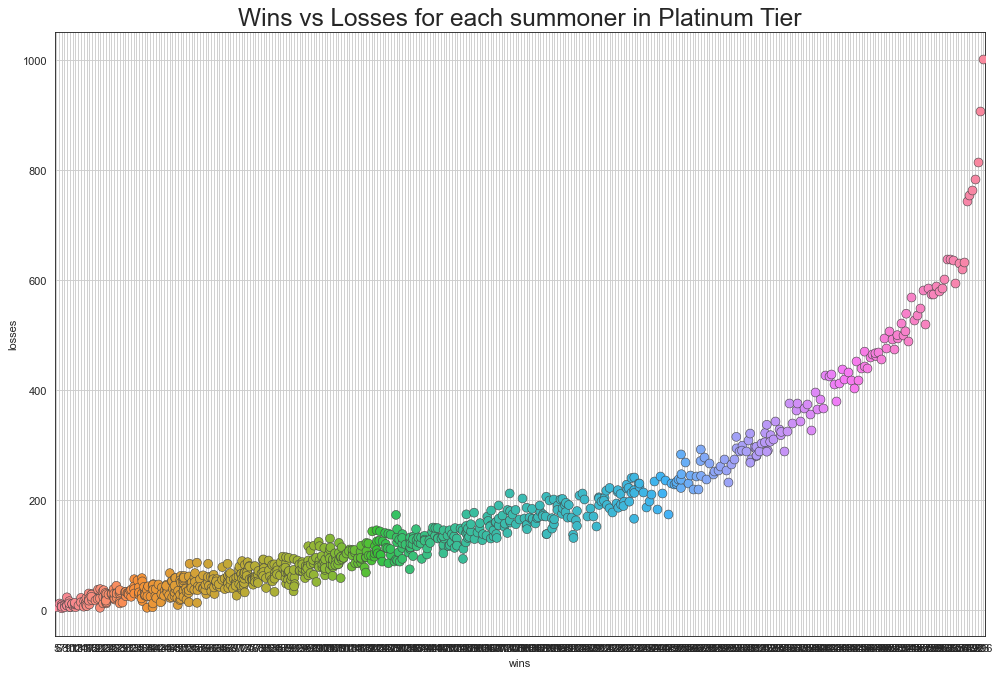

In [15]:
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_platinum_df.wins, clean_platinum_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Platinum Tier', fontsize=22)
plt.show()